# Customer Segmentation | K-means clustering

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
custdf=pd.read_csv(r'Mall_Customers.csv')

In [4]:
custdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
custdf.shape

(200, 5)

In [7]:
custdf.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
custdf.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Data Preparation

In [12]:
X = custdf.iloc[:,[3,4]].values

Selecting the number of clusters


WCSS: Within Clusters Sum of Squares

In [17]:
import warnings
warnings.filterwarnings('ignore')

wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

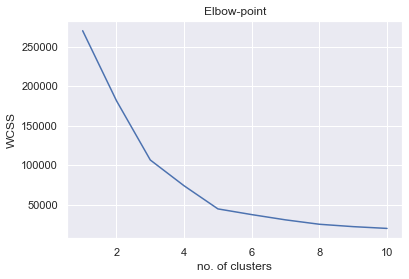

In [18]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow-point')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

taking the number of clusters as 5

### Applying K-means clustering

In [21]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=3)

Y = kmeans.fit_predict(X)

In [22]:
Y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [54]:
final_array=np.column_stack((X, Y))

In [55]:
final_array[:10]

array([[15, 39,  2],
       [15, 81,  3],
       [16,  6,  2],
       [16, 77,  3],
       [17, 40,  2],
       [17, 76,  3],
       [18,  6,  2],
       [18, 94,  3],
       [19,  3,  2],
       [19, 72,  3]], dtype=int64)

In [56]:
final_array[-10:]

array([[103,  23,   4],
       [103,  69,   1],
       [113,   8,   4],
       [113,  91,   1],
       [120,  16,   4],
       [120,  79,   1],
       [126,  28,   4],
       [126,  74,   1],
       [137,  18,   4],
       [137,  83,   1]], dtype=int64)

In [57]:
df3=pd.DataFrame(final_array,columns=['Annual Income (k$)','Spending Score (1-100)','Cluster'])

In [58]:
df3.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
